# Titanic Survival Prediction Analysis

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot') 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [61]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
combine = [df_train, df_test]

## Exploratory Data Analysis

In [62]:
print("Train Samples:", len(df_train))
print("Test Samples:", len(df_test))

Train Samples: 891
Test Samples: 418


In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Datatypes

In [65]:
print(df_train.dtypes)
print("")
print(df_test.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


* **Sex** should be converted to a numeric categorical variable (0/1 for male/female) 

#### Null Values

In [66]:
print(df_train.isnull().sum())
print("")
print(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


* **Age** and **Cabin** columns have a significant number of null values

#### Distribution of Numeric Features

In [67]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* ~38% survival rate
* Over 75% below the age of 40, but ages ranged from ~0 to 80
* ~30% traveled with a sibling or spouse 
*  Over 75% traveled with siblings or parents
* Significant variation in Fare price

In [68]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


* Similar distribution to training set for Age, SibSp, Parch, and Fare
* No variable are concerningly different from the training set

#### Distribution of Categorical Features

In [69]:
df_train.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Navratil, Master. Edmond Roger",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


* Each name appears to be unique
* ~65% are male (577 / 891)
* There are 3 unique values for Embarked, with the most common being S (72%)

#### Analyze Survival by Pivoting

In [70]:
df_train[["Pclass", "Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Higher classes had significantly higher survival rates

In [71]:
df_train[["Sex", "Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


Women had a significantly higher survival rate than men

In [72]:
df_train[["SibSp", "Survived"]].groupby("SibSp").mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


Those traveling with 1-2 siblings or spouses had a significantly higher rate of survival

In [73]:
df_train[["Parch", "Survived"]].groupby("Parch").mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


Those travling with 1-3 parents or children had a significanly higher survival rate

In [74]:
df_age = pd.DataFrame(columns = ["Age_Band", "Survived"])
df_age["Age_Band"] = pd.cut(df_train["Age"], 15)
df_age["Survived"] = df_train["Survived"].values
df_age.groupby("Age_Band").mean()

,Survived
Age_Band,
"(0.34, 5.725]",0.704545
"(5.725, 11.031]",0.333333
"(11.031, 16.336]",0.500000
"(16.336, 21.641]",0.307692
"(21.641, 26.947]",0.373913
"(26.947, 32.252]",0.417323
"(32.252, 37.557]",0.450000
"(37.557, 42.863]",0.406780
"(42.863, 48.168]",0.326531


Survival rates were not significantly different for any age range, with the exception of those 5 or younger, who had significantly higher survival rates

#### Analyzing Distributions with Visualizations

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


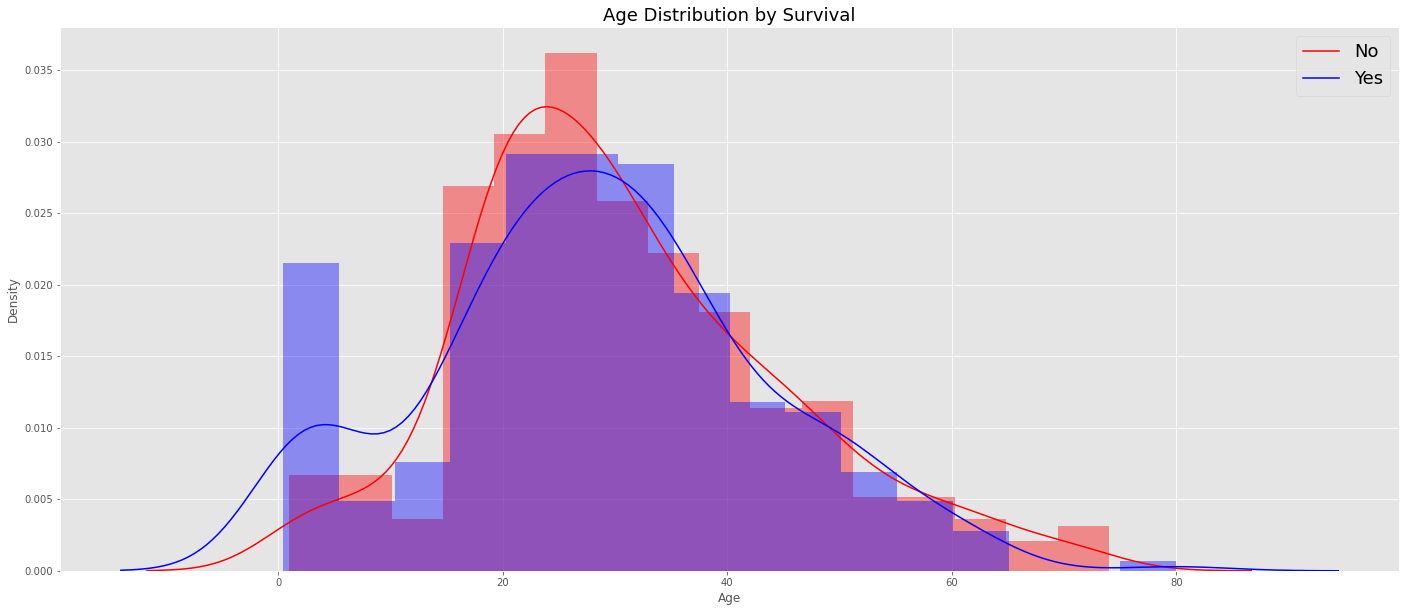

In [75]:
plt.figure(figsize = (24, 10))

sns.distplot(df_train[df_train["Survived"] == 0]["Age"], color = "red")
sns.distplot(df_train[df_train["Survived"] == 1]["Age"], color = "blue")

plt.title("Age Distribution by Survival", fontsize = 18)
plt.legend(labels = ["No", "Yes"], fontsize = 18)
plt.show()

Age alone does not appear to have a large impact on survival. However, it is possible that age within certain classs (Pclass) of passengers has an impact. 

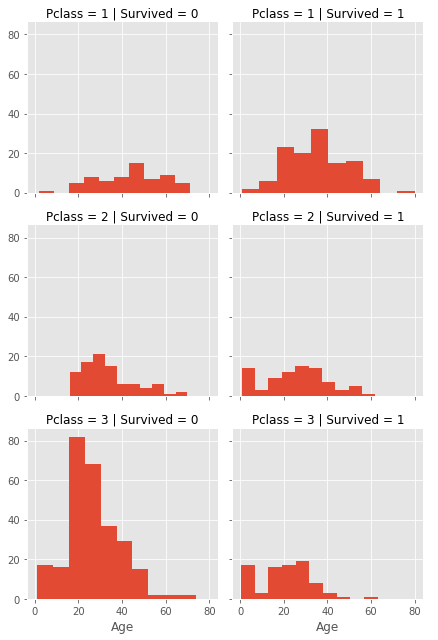

In [76]:
grid = sns.FacetGrid(df_train, col = "Survived", row = "Pclass")
grid.map(plt.hist, "Age")
grid.add_legend()

* Lower classes had lower average age
* Most infant passengers in Pclass 2 and 3 survived, despite the lower survival rates for other ages in those classes

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


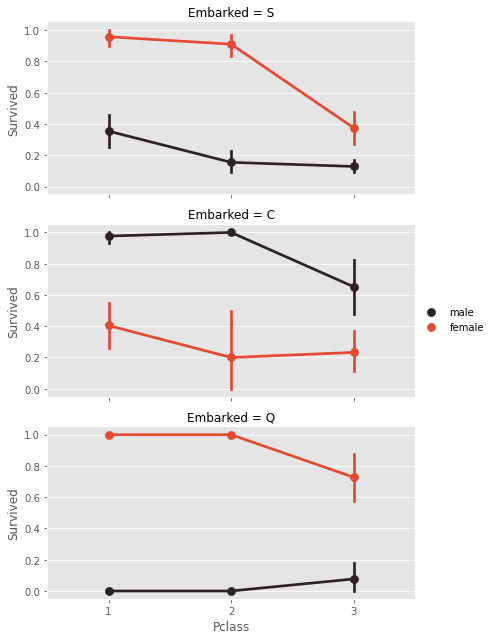

In [77]:
grid = sns.FacetGrid(df_train, row = "Embarked", size = 3, aspect = 2)
grid.map(sns.pointplot, "Pclass", "Survived", "Sex")
grid.add_legend()

* **Embarked C:** highest male survival rate and lowest female survival rate for all classes
* **Embarked Q:** lowest male survival rate and highest female survival rate for all classes

In [78]:
df_train[["Embarked", "Survived"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


* **Embarked C:** Despite having the lowest femal survival rate for all classes, C had the highest survival rate overall, meanining that the survival rate for men in C was significantly higher

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ikant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

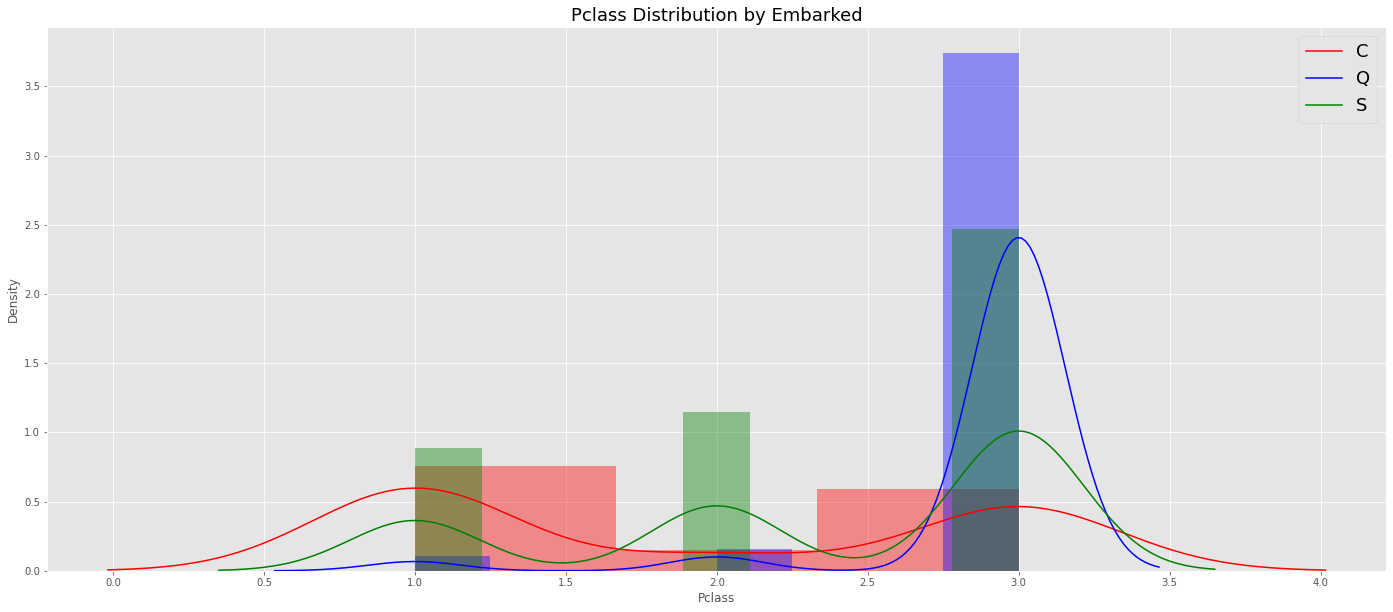

In [79]:
plt.figure(figsize = (24, 10))

sns.distplot(df_train[df_train["Embarked"] == "C"]["Pclass"], color = "red")
sns.distplot(df_train[df_train["Embarked"] == "Q"]["Pclass"], color = "blue")
sns.distplot(df_train[df_train["Embarked"] == "S"]["Pclass"], color = "green")

plt.title("Pclass Distribution by Embarked", fontsize = 18)
plt.legend(labels = ["C", "Q", "S"], fontsize = 18)
plt.show()

* **Embarked C:** C had the most Pclass 1 passengers (highest survival rate) and the least Pclass 3 passengers (lowest survival rate)

In [80]:
df_train[["Sex", "Pclass", "Survived"]].groupby(["Sex", "Pclass"]).mean()

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [81]:
df_train[["Sex", "Embarked", "Survived"]].groupby(["Sex", "Embarked"]).mean()

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603

In [82]:
df_train[["Embarked", "Pclass"]].groupby(["Embarked"]).mean()

,Pclass
Embarked,
C,1.886905
Q,2.909091
S,2.350932


* Males in higher Pclasses had significantly higher survival rates in higher classes
* Women had significantly higher survival rates than men, with the exception of Embarked C. However, this could be due to a correlation between Pclass and Embarked, and in turn Pclass and Survived. Embarked C had higher Pclasses, and higher Pclasses had higher survival rates for men.

C:\Users\ikant\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


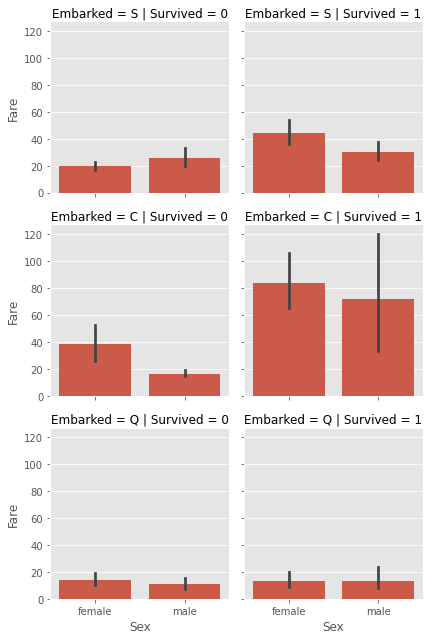

In [83]:
grid = sns.FacetGrid(df_train, row = 'Embarked', col = 'Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

* Higher fares had higher survival rates
* Embarked C had the highest survival rate, followed by S and then Q

## Feature Engineering

In [84]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Drop Ticket and Cabin Columns

In [85]:
for df in combine:
    print("Before:", df.columns)
    df.drop(["Ticket", "Cabin"], axis = 1, inplace = True)
    print("After:", df.columns)
    print("")

Before: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
After: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

Before: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
After: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')



#### Convert Name to Title

In [86]:
# Get title from each name by extracting:

# 1) from the first letter (uppercase or lowercase) --> ([A-Za-z])
# 2) continued to the end of that sequence of letters (word) --> ([A-Za-z+])
# 3) for the series of letters that ends in a period --> ([A-Za-z+])\.

for df in combine:
    print("Before:", df.columns)
    df["Title"] = df_train["Name"].str.extract("([A-Za-z]+)\.", expand=False)
    print("After:", df.columns)
    print("")

Before: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')
After: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title'],
      dtype='object')

Before: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
After: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')



In [87]:
df_train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Mme           1
Lady          1
Jonkheer      1
Sir           1
Capt          1
Countess      1
Ms            1
Name: Title, dtype: int64

In [88]:
df_test["Title"].value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Don         1
Mme         1
Name: Title, dtype: int64

In [89]:
for df in combine:
    
    df["Title"].replace(["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare", \
               inplace = True)
    
    df["Title"].replace(["Mlle", "Ms"], "Miss", inplace = True)
    
    df["Title"].replace("Mme", "Mrs", inplace = True)
    
df_train[["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


Survival rates differed by title, even between males and females separately

#### Convert Categorical Features (Title, Sex, Embarked) to Numeric

In [90]:
title_map = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
sex_map = {"male":0, "female":1}
embarked_map = {"S":1, "C":2, "Q":3}

for df in combine:
    
    df["Title"] = df["Title"].map(title_map)
    df["Title"] = df["Title"].fillna(0)
    
    df["Sex"] = df["Sex"].map(sex_map)
    
    df["Embarked"] = df["Embarked"].map(embarked_map)

In [91]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,71.2833,2.0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1.0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1.0,1


#### Drop Name and PassengerID

In [92]:
for df in combine:
    df.drop(["PassengerId", "Name"], axis = 1, inplace = True)

In [93]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1.0,1
1,1,1,1,38.0,1,0,71.2833,2.0,3
2,1,3,1,26.0,0,0,7.9250,1.0,2
3,1,1,1,35.0,1,0,53.1000,1.0,3
4,0,3,0,35.0,0,0,8.0500,1.0,1


#### Remove / Replace Missing Values

In [94]:
print("Total Samples:", len(df_train))
df_train.isnull().sum()

Total Samples: 891


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [95]:
print("Total Samples:", len(df_test))
df_test.isnull().sum()

Total Samples: 418


Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
Title        0
dtype: int64

In [96]:
for df in combine:
    df.dropna(inplace = True)

#### Create New Feature for Family Size

In [97]:
for df in combine:
    df["Fam_Size"] = df["SibSp"] + df["Parch"] + 1
    df.drop(["SibSp", "Parch"], axis = 1, inplace = True)

df_train[["Fam_Size", "Survived"]].groupby("Fam_Size").mean()

,Survived
Fam_Size,
1,0.318408
2,0.546763
3,0.569892
4,0.777778
5,0.272727
6,0.136364
7,0.333333
8,0.000000


## Predictive Modeling

In [98]:
len(df_train)

712

In [99]:
len(df_test)

331

In [100]:
X = df_train.drop("Survived", axis = 1).values
Y = df_train["Survived"].values

#### Split Data into Training and Testing

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [103]:
#x_train = df_train.drop("Survived", axis = 1).values
#y_train = df_train["Survived"].values

#x_test = df_test.values

In [104]:
from sklearn.preprocessing import StandardScaler
x_train_norm = StandardScaler().fit_transform(x_train)
x_test_norm = StandardScaler().fit_transform(x_test)

#### Clustering

In [105]:
from sklearn.cluster import KMeans
import scikitplot as skplt

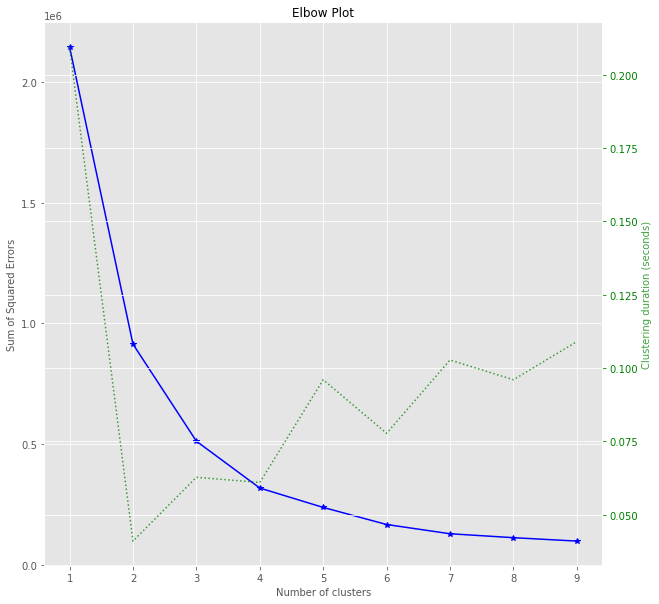

In [106]:
kmeans = KMeans(random_state = 25)

skplt.cluster.plot_elbow_curve(kmeans, X, cluster_ranges = range(1, 10), n_jobs = -1, figsize = (10, 10))

plt.show()

Based on the Elbow Plot, the ideal number of clusters appears to be 4 clusters. 

In [107]:
kmeans = KMeans(n_clusters = 5, random_state = 25).fit(X)

In [108]:
df_clust = df_train.copy()
df_clust["Cluster"] = kmeans.labels_

for i in range(5):
    print("Label:", np.unique(kmeans.labels_, return_counts = True)[0][i])
    print("Counts:", np.unique(kmeans.labels_, return_counts = True)[1][i])
    print("")

Label: 0
Counts: 564

Label: 1
Counts: 15

Label: 2
Counts: 100

Label: 3
Counts: 30

Label: 4
Counts: 3



In [109]:
df_clust.groupby("Cluster").mean().sort_values("Survived", ascending = False)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Fam_Size
Cluster,,,,,,,,
4,1.000000,1.000000,0.333333,35.333333,512.329200,2.000000,1.333333,1.333333
1,0.733333,1.000000,0.733333,30.333333,239.991940,1.533333,1.933333,3.333333
3,0.733333,1.000000,0.633333,32.430667,131.183883,1.500000,2.200000,2.466667
2,0.630000,1.280000,0.470000,35.440000,66.937044,1.370000,2.010000,2.320000
0,0.335106,2.515957,0.320922,28.417110,15.684034,1.218085,1.723404,1.819149


Clustering shows us 5 natural segments (in order of survival rate):
* **Cluster 4:** 3 exceptionally high paying, class 1 travelers
* **Cluster 1:** 15 high paying, class 1, mostly female, travelers
* **Cluster 3:** 30 high paying (less so than classes 4 and 1), class 1 travelers
* **Cluster 2:** 100 low paying, mostly class 1 travelers
* **Cluster 0:** 564 lowest paying, class 2 and 3, mostly male travelers

#### Classification

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

In [111]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Linear Support Vector Classifier": LinearSVC(),
    "RandomForestClassifier": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian": GaussianNB(),
    "Perceptron": Perceptron(),
    "SGD Classifier": SGDClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [112]:
train_acc = []
train_acc_norm = []

for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    training_accuracy = cross_val_score(classifier, x_train, y_train, cv = 5)
    
    classifier.fit(x_train_norm, y_train)
    training_accuracy_norm = cross_val_score(classifier, x_train_norm, y_train, cv = 5)
    
    train_acc_norm.append(round(training_accuracy_norm.mean(), 2))
    train_acc.append(round(training_accuracy.mean(), 2))

C:\Users\ikant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ikant\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ikant\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\ikant\anaconda3\lib\site-packages\sklearn\svm\_base.p

In [113]:
print("Training Accuracy")
print("")

for (name, classifier), acc in zip(classifiers.items(), train_acc):
    print(name, ":", acc)

print("")

print("Training Accuracy: Standardized")
print("")

for (name, classifier), acc in zip(classifiers.items(), train_acc_norm):
    print(name, ":", acc)

Training Accuracy

Logistic Regression : 0.79
Support Vector Classifier : 0.67
Linear Support Vector Classifier : 0.69
RandomForestClassifier : 0.8
K-Nearest Neighbors : 0.7
Gaussian : 0.76
Perceptron : 0.69
SGD Classifier : 0.65
Decision Tree Classifier : 0.76

Training Accuracy: Standardized

Logistic Regression : 0.79
Support Vector Classifier : 0.81
Linear Support Vector Classifier : 0.79
RandomForestClassifier : 0.79
K-Nearest Neighbors : 0.78
Gaussian : 0.76
Perceptron : 0.68
SGD Classifier : 0.76
Decision Tree Classifier : 0.76


The normalized x values had same or better training accuracy results

#### Logistic Regression

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [160]:
parameters_logreg = {"penalty" : ["l2"],
                     "C" : [0.001, 0.01, 0.1, 1, 10, 100],
                     "solver" : ["lbfgs"],
                     "max_iter" : [1000]}

In [161]:
LogReg = GridSearchCV(LogisticRegression(), parameters_logreg, cv = 5).fit(x_train, y_train)

print("Best hyperparameters:", LogReg.best_params_)
print("Best accuracy:", LogReg.best_score_)

Best hyperparameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy: 0.8013662474771


In [162]:
LogReg = LogisticRegression(C = 0.1, max_iter = 1000, penalty = "l2", solver = "lbfgs").fit(x_train, y_train)
LogReg_yhat = LogReg.predict(x_test)

LogReg_acc = LogReg.score(x_test, y_test)
print("Logistic Regression Testing Accuracy =", LogReg_acc)

LogReg_f1 = f1_score(y_test, LogReg_yhat)
print("Logistic Regression F1 Score =", LogReg_f1)

Logistic Regression Testing Accuracy = 0.8601398601398601
Logistic Regression F1 Score = 0.8275862068965518


In [163]:
df_LogReg = pd.DataFrame(columns = ["Feature", "Coefficient"])
df_LogReg["Feature"] = df_train.columns.delete(0)
df_LogReg["Coefficient"] = LogReg.coef_[0]
df_LogReg.sort_values(by = "Coefficient", ascending = False)

,Feature,Coefficient
1,Sex,1.336473
5,Title,0.488445
3,Fare,0.005850
4,Embarked,-0.031019
2,Age,-0.032757
6,Fam_Size,-0.295891
0,Pclass,-0.717355


* **Sex** has the highest positive coefficient, meaning that females have a strong positive effect on survival rate
* **Pclass** has the highest negative coefficient, meaning that higher classes (i.e. Class 1) have higher survival rates
* Other Significant Features: **Title** and **Fam_Size**

#### Support Vector Machines

In [164]:
SVM = SVC().fit(x_train_norm, y_train)
SVM_yhat = SVM.predict(x_test_norm)

SVM_acc = SVM.score(x_test_norm, y_test)
print("SVM Testing Accuracy =", SVM_acc)

SVM_f1 = f1_score(y_test, SVM_yhat)
print("SVM F1 Score =", SVM_f1)

SVM Testing Accuracy = 0.8461538461538461
SVM F1 Score = 0.7924528301886792


#### Linear Support Vector Machines

In [165]:
Linear_SVM = LinearSVC().fit(x_train_norm, y_train)
Linear_SVM_yhat = Linear_SVM.predict(x_test_norm)

Linear_SVM_acc = Linear_SVM.score(x_test_norm, y_test)
print("Linear SVM Testing Accuracy =", Linear_SVM_acc)

Linear_SVM_f1 = f1_score(y_test, Linear_SVM_yhat)
print("Linear SVM F1 Score =", Linear_SVM_f1)

Linear SVM Testing Accuracy = 0.8741258741258742
Linear SVM F1 Score = 0.8448275862068965


C:\Users\ikant\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Random Forest Classification

In [166]:
RandFor = RandomForestClassifier(n_estimators = 100).fit(x_train, y_train)
RandFor_yhat = RandFor.predict(x_test)

RandFor_acc = RandFor.score(x_test_norm, y_test)
print("Random Forest Testing Accuracy =", RandFor_acc)

RandFor_f1 = f1_score(y_test, RandFor_yhat)
print("Random Forest F1 Score =", RandFor_f1)

Random Forest Testing Accuracy = 0.8391608391608392
Random Forest F1 Score = 0.7543859649122806


#### K-Nearest Neighbors

In [167]:
parameters_knn = {"n_neighbors" : list(range(1, 11)),
                  "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                  "p" : [1, 2]}

In [168]:
KNN = GridSearchCV(KNeighborsClassifier(), parameters_knn, cv = 5).fit(x_train_norm, y_train)

print("Best hyperparameters:", KNN.best_params_)
print("Best accuracy:", KNN.best_score_)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
Best accuracy: 0.8102002794597112


In [169]:
KNN = KNeighborsClassifier(algorithm = "auto", n_neighbors = 9, p = 1).fit(x_train_norm, y_train)
KNN_yhat = KNN.predict(x_test_norm)

KNN_acc = KNN.score(x_test_norm, y_test)
print("KNN Testing Accuracy =", RandFor_acc)

KNN_f1 = f1_score(y_test, KNN_yhat)
print("KNN F1 Score =", KNN_f1)

KNN Testing Accuracy = 0.8391608391608392
KNN F1 Score = 0.8245614035087719


#### Gaussian Naive Bayes Classification

In [170]:
Gaussian = GaussianNB().fit(x_train, y_train)
Gaussian_yhat = Gaussian.predict(x_test)

Gaussian_acc = Gaussian.score(x_test, y_test)
print("Gaussian Testing Accuracy =", Gaussian_acc)

Gaussian_f1 = f1_score(y_test, Gaussian_yhat)
print("Gaussian F1 Score =", Gaussian_f1)

Gaussian Testing Accuracy = 0.8811188811188811
Gaussian F1 Score = 0.8571428571428572


#### Perceptron Binary Classification

In [171]:
Perc = Perceptron().fit(x_train_norm, y_train)
Perc_yhat = Perc.predict(x_test)

Perc_acc = Perc.score(x_test_norm, y_test)
print("Perceptron Testing Accuracy =", Perc_acc)

Perc_f1 = f1_score(y_test, Perc_yhat)
print("Perceptron F1 Score =", Perc_f1)

Perceptron Testing Accuracy = 0.7832167832167832
Perceptron F1 Score = 0.6140350877192982


#### Stochastic Gradient Descent Classifier

In [179]:
SGD = SGDClassifier().fit(x_train_norm, y_train)
SGD_yhat = SGD.predict(x_test)

SGD_acc = SGD.score(x_test_norm, y_test)
print("SGD Testing Accuracy =", SGD_acc)

SGD_f1 = f1_score(y_test, SGD_yhat)
print("SGD F1 Score =", SGD_f1)

SGD Testing Accuracy = 0.8321678321678322
SGD F1 Score = 0.5


#### Decision Tree Classifier 

In [173]:
parameters_tree = {"criterion" : ["gini", "entropy"],
                   "splitter" : ["best", "random"],
                   "max_depth" : list(range(1, 20)),
                   "min_samples_leaf" : list(range(4, 12))}

In [174]:
DecTree = GridSearchCV(DecisionTreeClassifier(), parameters_tree, cv = 5).fit(x_train, y_train)

print("Best hyperparameters:", DecTree.best_params_)
print("Best accuracy:", DecTree.best_score_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'splitter': 'random'}
Best accuracy: 0.8136780003105109


In [175]:
DecTree = DecisionTreeClassifier(criterion = "gini", max_depth = 17, min_samples_leaf = 8, splitter = "best").fit(x_train, y_train)
DecTree_yhat = DecTree.predict(x_test)

DecTree_acc = DecTree.score(x_test, y_test)
print("Decision Tree Testing Accuracy =", DecTree_acc)

DecTree_f1 = f1_score(y_test, DecTree_yhat)
print("Decision Tree F1 Score =", DecTree_f1)

Decision Tree Testing Accuracy = 0.8671328671328671
Decision Tree F1 Score = 0.8288288288288288


## Model Evaluation

In [184]:
acc_list = [LogReg_acc, SVM_acc, Linear_SVM_acc, RandFor_acc, KNN_acc, Gaussian_acc, Perc_acc, SGD_acc, DecTree_acc]
f1_list = [LogReg_f1, SVM_f1, Linear_SVM_f1, RandFor_f1, KNN_f1, Gaussian_f1, Perc_f1, SGD_f1, DecTree_f1]

clfs = []

for name, classifier in classifiers.items():
    clfs.append(name)

df_acc = pd.DataFrame(columns = ["Classifier", "Accuracy", "F1 Score"])
df_acc["Classifier"] = clfs
df_acc["Accuracy"] = acc_list
df_acc["F1 Score"] = f1_list

df_acc = df_acc.sort_values("Accuracy", ascending = False)

Text(0.5, 1.0, 'Accuracy by Classification Algorithm')

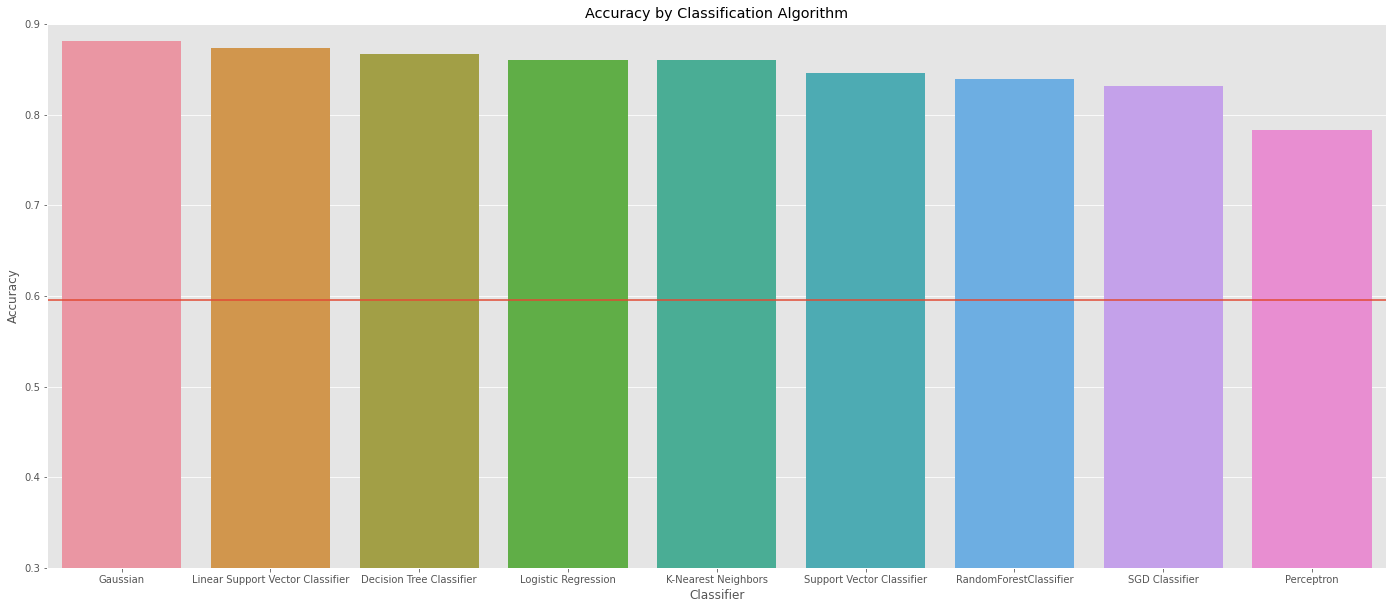

In [185]:
pct_survived = len(df_train[df_train["Survived"] == 1]) / len(df_train)

plt.figure(figsize = (24, 10))

sns.barplot(data = df_acc, x = "Classifier", y = "Accuracy")

plt.ylim(0.3, 0.9)
plt.axhline(1 - pct_survived)
plt.title("Accuracy by Classification Algorithm")

Text(0.5, 1.0, 'F1 Score by Classification Algorithm')

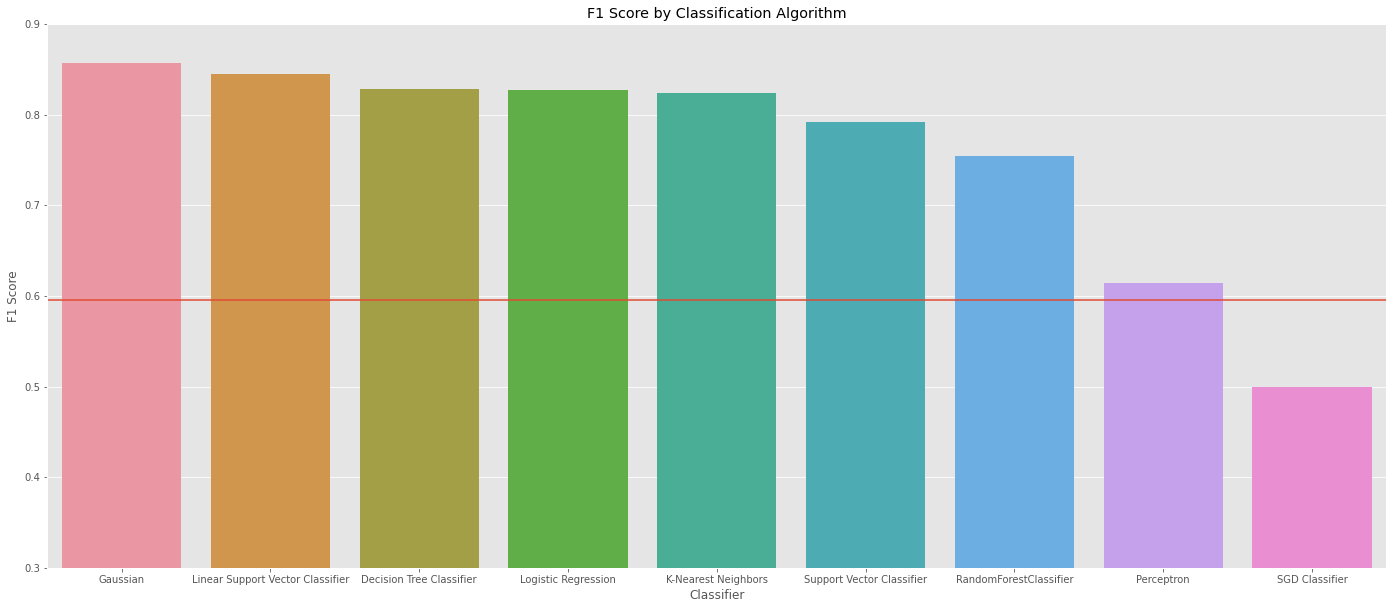

In [186]:
df_acc = df_acc.sort_values("F1 Score", ascending = False)

pct_survived = len(df_train[df_train["Survived"] == 1]) / len(df_train)

plt.figure(figsize = (24, 10))

sns.barplot(data = df_acc, x = "Classifier", y = "F1 Score")

plt.ylim(0.3, 0.9)
plt.axhline(1 - pct_survived)
plt.title("F1 Score by Classification Algorithm")

In [190]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y, y_predict):
    cm = confusion_matrix(y, y_predict)
    fig = plt.figure(figsize = (8, 5))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = "g");
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Dead', 'Survived']); ax.yaxis.set_ticklabels(['Dead', 'Survived'])

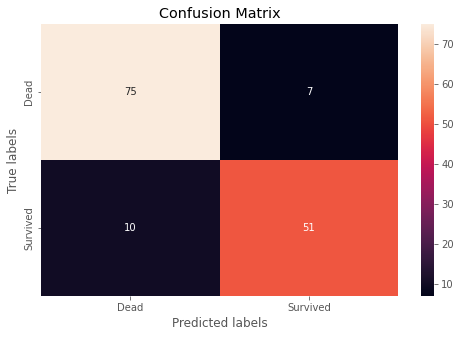

In [191]:
plot_confusion_matrix(y_test, Gaussian_yhat)

In [201]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Gaussian_yhat))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        82
           1       0.88      0.84      0.86        61

    accuracy                           0.88       143
   macro avg       0.88      0.88      0.88       143
weighted avg       0.88      0.88      0.88       143

